# Semana 9 - Reto Calidad del Agua.
 * Presentado por:
 - Jorge Estivent Cruz Mahecha A01793808 
 + Aguas Superficiales

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
import qeds
qeds.themes.mpl_style();
from yellowbrick.cluster import KElbowVisualizer


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Cargamos el Data Set
#Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv
#Escalas_superficial.csv
path_escala_superficial = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-joshiecruz/155e0b914cc43188617e30ff342bc34e74d04a89/Entregas%20Semanales/Reto/1era%20Entrega/BaseDatos/Escalas_superficial.csv'
path_calidad_superficial = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-joshiecruz/155e0b914cc43188617e30ff342bc34e74d04a89/Entregas%20Semanales/Reto/1era%20Entrega/BaseDatos/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'
dfEscalasSuperficial = pd.read_csv(path_escala_superficial,encoding='cp1252')
dfCalidadSuperficial= pd.read_csv(path_calidad_superficial,encoding='cp1252')
dfEscalasSuperficial.info()
dfCalidadSuperficial.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   CALIDAD DEL AGUA PARA TOXICIDAD  45 non-null     object
 1   CRITERIO                         45 non-null     object
 2   DESCRIPCION                      44 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA   


Agregando datos dataset:

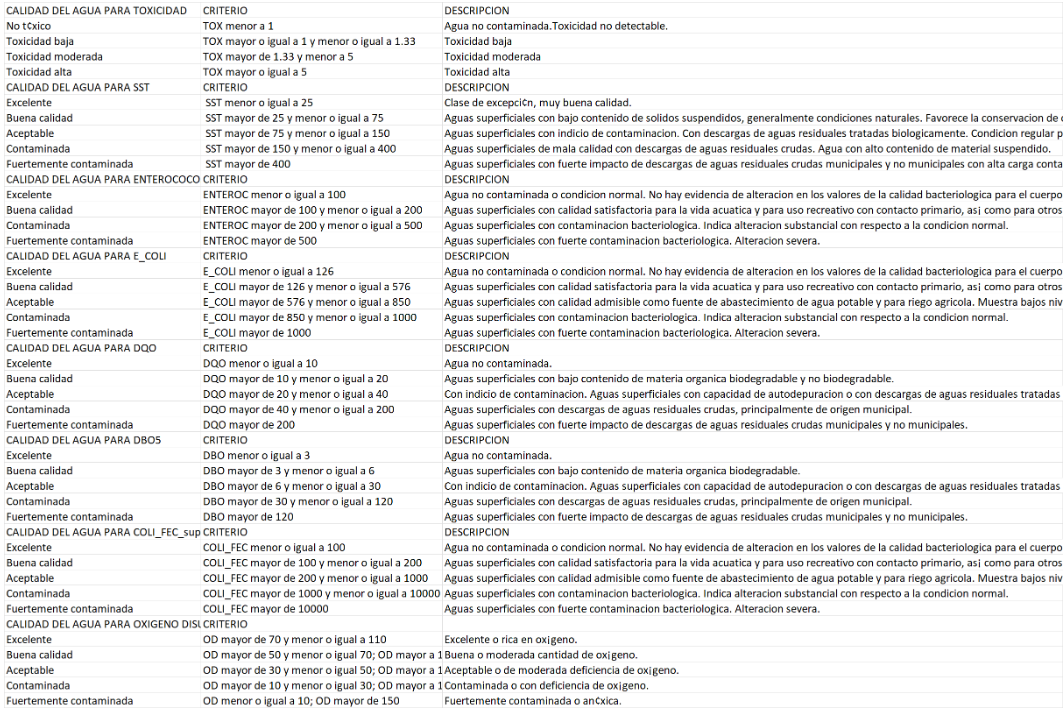


In [3]:
dfCalidadSuperficial.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [4]:
dfEscalasSuperficial.head()

,CALIDAD DEL AGUA PARA TOXICIDAD,CRITERIO,DESCRIPCION
0,No t¢xico,TOX menor a 1,Agua no contaminada.Toxicidad no detectable.
1,Toxicidad baja,TOX mayor o igual a 1 y menor o igual a 1.33,Toxicidad baja
2,Toxicidad moderada,TOX mayor de 1.33 y menor a 5,Toxicidad moderada
3,Toxicidad alta,TOX mayor o igual a 5,Toxicidad alta
4,CALIDAD DEL AGUA PARA SST,CRITERIO,DESCRIPCION


In [5]:
dfCalidadSuperficial.shape

(4141, 55)

In [6]:
dfCalidadSuperficial.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

In [7]:
# Validando 
#dfEscalasSuperficial.isna().sum()
dfCalidadSuperficial.isna().sum()

CLAVE                      648
SITIO                      648
ORGANISMO_DE_CUENCA        648
ESTADO                     648
MUNICIPIO                  648
CUENCA                     649
CUERPO DE AGUA             662
TIPO                       648
SUBTIPO                    662
LONGITUD                   648
LATITUD                    648
PERIODO                    648
DBO_mg/L                  1560
CALIDAD_DBO               1560
DQO_mg/L                  1560
CALIDAD_DQO               1560
SST_mg/L                   652
CALIDAD_SST                652
COLI_FEC_NMP_100mL        1559
CALIDAD_COLI_FEC          1559
E_COLI_NMP_100mL          1559
CALIDAD_E_COLI            1559
ENTEROC_NMP_100mL         3237
CALIDAD_ENTEROC           3237
OD_PORC                   2344
CALIDAD_OD_PORC           2344
OD_PORC_SUP               2522
CALIDAD_OD_PORC_SUP       2522
OD_PORC_MED               3654
CALIDAD_OD_PORC_MED       3654
OD_PORC_FON               3195
CALIDAD_OD_PORC_FON       3195
TOX_D_48

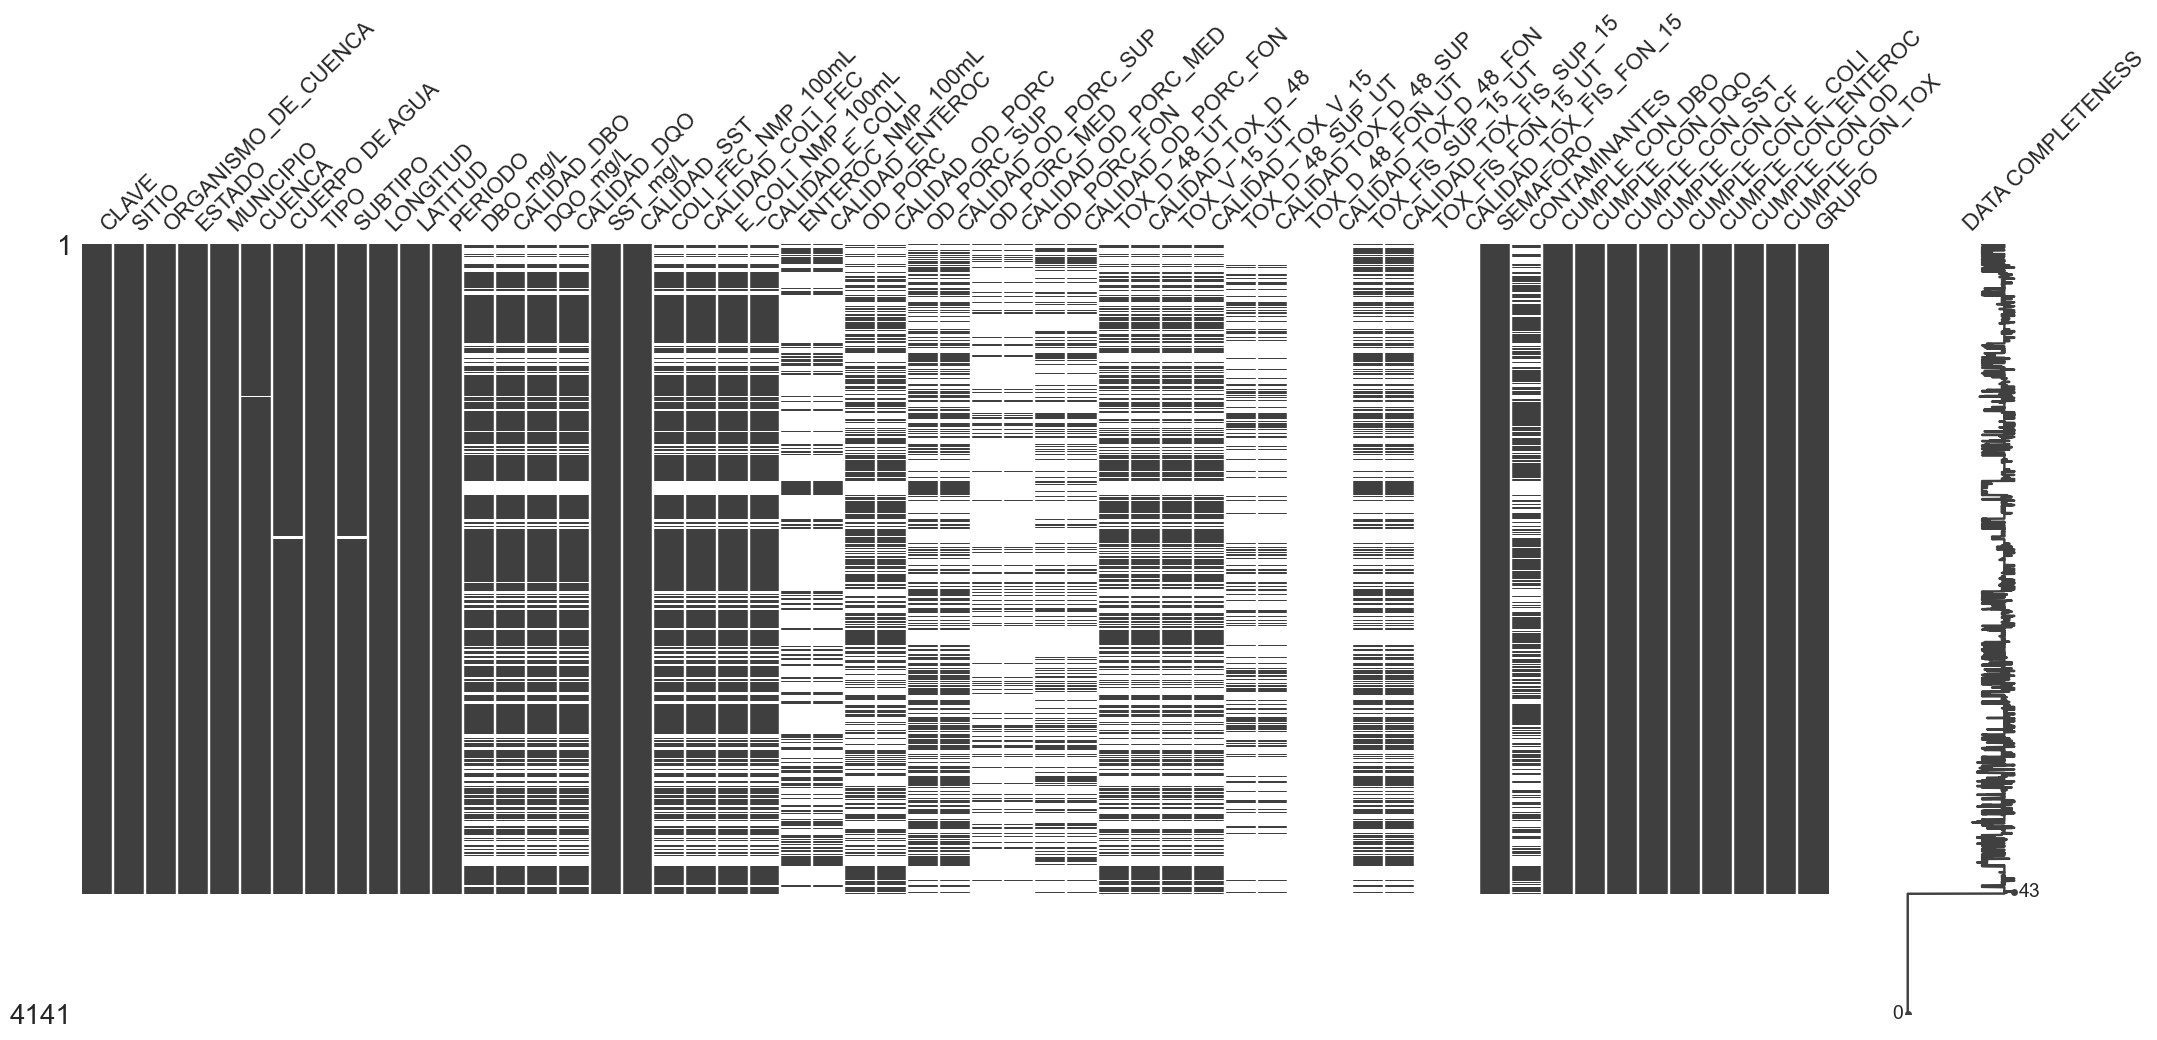

In [8]:
msno.matrix(dfCalidadSuperficial, labels=True)
plt.show()

In [9]:
#Procedemos a eliminar las columnas vacias , 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',  TOX_FIS_FON_15_UT','CALIDAD_TOX_FIS_FON_15'
dfCalidadSuperficial = dfCalidadSuperficial.drop('TOX_D_48_FON_UT',axis=1)
dfCalidadSuperficial = dfCalidadSuperficial.drop('CALIDAD_TOX_D_48_FON',axis=1)
dfCalidadSuperficial = dfCalidadSuperficial.drop('TOX_FIS_FON_15_UT',axis=1)
dfCalidadSuperficial = dfCalidadSuperficial.drop('CALIDAD_TOX_FIS_FON_15',axis=1)

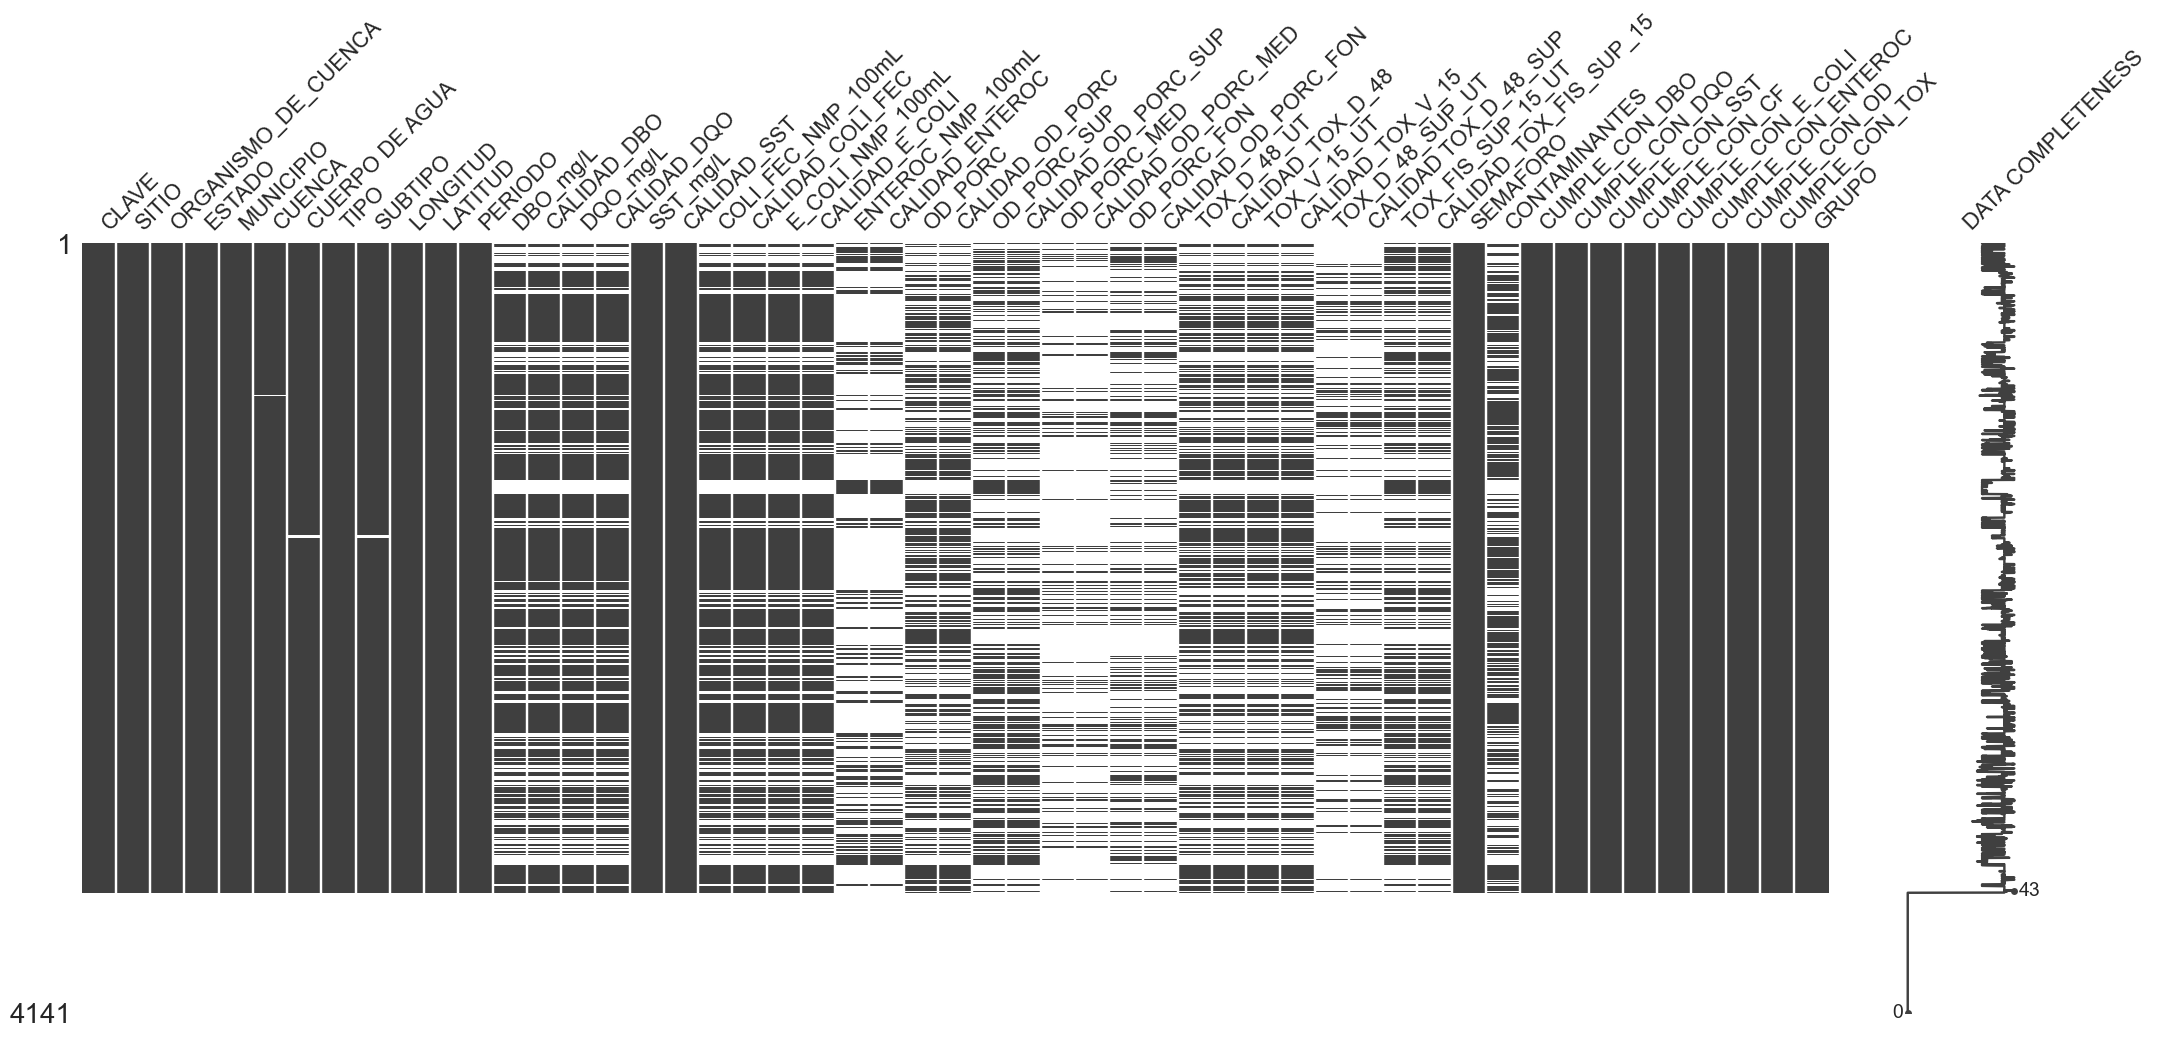

In [10]:
msno.matrix(dfCalidadSuperficial, labels=True)
plt.show()

In [11]:
dfCoordMapa=dfCalidadSuperficial[["LATITUD","LONGITUD","SEMAFORO"]]
dfCoordMapa.shape

(4141, 3)

In [12]:
dfCoordMapa["COORDENADAS"] = list(zip(dfCoordMapa.LONGITUD, dfCoordMapa.LATITUD))
dfCoordMapa["COORDENADAS"] = dfCoordMapa["COORDENADAS"].apply(Point)
gdf = gpd.GeoDataFrame(dfCoordMapa, geometry="COORDENADAS")


C:\Users\joshi\AppData\Local\Temp\ipykernel_34136\1577205945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCoordMapa["COORDENADAS"] = list(zip(dfCoordMapa.LONGITUD, dfCoordMapa.LATITUD))
C:\Users\joshi\AppData\Local\Temp\ipykernel_34136\1577205945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCoordMapa["COORDENADAS"] = dfCoordMapa["COORDENADAS"].apply(Point)


In [13]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

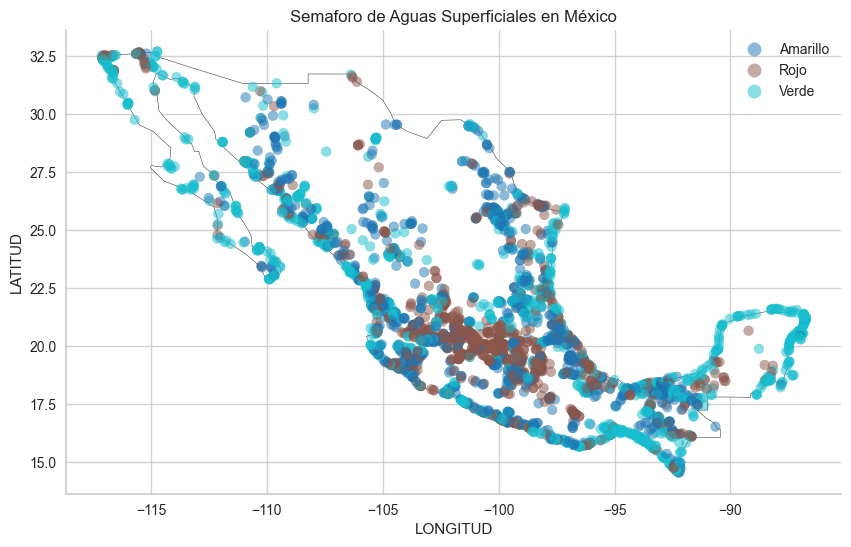

In [18]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

#gdf.plot(ax=gax, column='SEMAFORO', alpha = 0.5, legend=True, cmap=cmap)
gdf.plot(ax=gax, column='SEMAFORO',legend=True, alpha = 0.5)
gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Semaforo de Aguas Superficiales en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)


plt.show()

In [22]:
long_lat_sub =dfCoordMapa
# Grafica de codo
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(long_lat_sub).score(long_lat_sub) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

ValueError: could not convert string to float: 'Rojo'